**Table of contents**<a id='toc0_'></a>    
- [Notes](#toc1_)    
  - [To do](#toc1_1_)    
- [Package instalation](#toc2_)    
- [1. Test No data frame single likelihood](#toc3_)    
- [2. Test without data frame & with multiple likelihood](#toc4_)    
- [3. Test with data frame in likelihood](#toc5_)    
- [4. Indices](#toc6_)    
- [5. Model comparaison](#toc7_)    
- [6. Multiple indices](#toc8_)    
- [Categorical interactions](#toc9_)    
- [ 8. Continuous interactions](#toc10_)    
- [9. Binomial model](#toc11_)    
- [10. Binomial with index](#toc12_)    
- [11. Poisson](#toc13_)    
- [12. This doesn't work due to 'P^' WIP: need to implement mathematical operation within formulas](#toc14_)    
- [13. Negative binomial (PB estimation)](#toc15_)    
- [14. Multinomial](#toc16_)    
  - [14.1. Categorical models (WIP: tfd.multinomial to handle)](#toc16_1_)    
  - [14.2. Multinomial in disguise as Binomial](#toc16_2_)    
  - [14.3. Multinomial in disguise as Poisson](#toc16_3_)    
- [15. Beta binomial](#toc17_)    
  - [WIP: Need to implemantation of tf function within formula to add tf.sigmoid](#toc17_1_)    
  - [WIP: Need to include other params in traces](#toc17_2_)    
- [16. Zero-inflated outcomes (WIP)](#toc18_)    
  - [Using ZeroInflatedNegativeBinomial function](#toc18_1_)    
  - [Using Inflated function](#toc18_2_)    
- [Ordered categorical outcomes (TODO)](#toc19_)    
- [Ordered categorical predictors (TODO)](#toc20_)    
- [Varying Slopes Models](#toc21_)    
- [Full parameters estimations](#toc22_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Notes](#toc0_)

- Gpu computation is not always better, it depends of your model size: https://stackoverflow.com/questions/55749899/training-a-simple-model-in-tensorflow-gpu-slower-than-cpu

- Depending on the float precision model outputs may differ.

- Data frame need to be set with correct types (int, float) otherwise model outputs may differ.


## <a id='toc1_1_'></a>[To do](#toc0_)
    1.  Allow mathematical operation within formula
    2.  Redo GUI
    3.  Help functions
    4.  Documentation
    5.  Multinomial models to be run with Multinomial distribution
    6.  Multiple likelihoods can have different types: independent models -> independent HMC, dependent priors -> 
    7.  Handle tf function within formula
    8.  Priors can have args and kwargs
    9. posterior need to handle multiple likelihood

Current WIP BetaBinomial, require to handle multiple likelihoods

# <a id='toc2_'></a>[Package instalation](#toc0_)

In [ ]:
#try:
#  %pip install tensorflow tensorflow_probability pandas numpy arviz seaborn functools matplotlib.pyplot
#  %pip install git+https://github.com/BGN-for-ASNA/BI.git
#except:
#  pass

# <a id='toc3_'></a>[1. Test No data frame single likelihood](#toc0_)

In [1]:
from  main import *
formula = dict(main = 'y~Normal(m,s)',
            likelihood = 'm ~  alpha + beta',
            prior1 = 's~Exponential(1)',
            prior2 = 'alpha ~ Normal(0,1)',
            prior3 = 'beta ~ Normal(0,1)')  
self = model(formula= formula, float = 16) 
self.sample()

2024-02-22 10:57:42.388815: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-22 10:57:42.409597: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 10:57:42.409620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 10:57:42.410131: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 10:57:42.413690: I tensorflow/core/platform/cpu_feature_guar

2024-02-22 10:57:42.806064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-02-22 10:57:43.901615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:43.914163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:43.914196: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:44.111094: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

{'s': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.7583619], dtype=float32)>,
 'beta': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.9265922], dtype=float32)>,
 'alpha': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8860106], dtype=float32)>,
 'y': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7311802], dtype=float32)>}

# <a id='toc4_'></a>[2. Test without data frame & with multiple likelihood](#toc0_)

In [2]:
from  main import *
formula = dict(main = 'y~Normal(m,s)',
            likelihood = 'm ~  alpha + beta',
            prior1 = 's~Exponential(1)',
            prior2 = 'alpha ~ Normal(0,1)',
            prior3 = 'beta ~ Normal(0,1)',
            
            main1 = 'z~Normal(m2,s2)',
            likelihood2 = 'm2 ~ alpha2 + beta2',
            prior4 = 's2~Exponential(1)',
            prior5 = 'alpha2 ~ Normal(0,1)',
            prior6 = 'beta2 ~ Normal(0,1)') 
self = model(formula= formula, float = 16)
self.log_prob(self.sample(10))

2024-02-22 10:57:44.537072: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:44.537119: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:44.537133: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:44.537301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:44.537314: I tensorflow/core/common_runtime/gpu/gpu

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ -5.383741 , -10.799682 , -13.087972 , -18.258266 ,  -5.054945 ,
        -6.4144487, -12.585139 , -10.699943 , -10.033747 , -10.196401 ],
      dtype=float32)>

# <a id='toc5_'></a>[3. Test with data frame in likelihood](#toc0_)

In [3]:
from  main import *
## Model m4.3
d = pd.read_csv('./data/Howell1.csv', sep=';')
d = d[d.age > 18]
#self.df["weight.per.g"].pipe(lambda x: (x - x.mean()) / x.std())
d.weight = d.weight - d.weight.mean()
d.age = d.age - d.age.mean()
formula = dict(main1 = 'height ~ Normal(mu,sigma)',
            likelihood = 'mu ~ alpha + beta * weight',
            prior1 = 'sigma ~ Uniform(0,50)',
            prior2 = 'alpha ~ Normal(178,20)',
            prior3 = 'beta ~ Normal(0,1)')    

self = model(formula, df = d, float = 32)
self.fit(observed_data = dict(height =d.height.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
self.summary()

# expected 
#           Mean    StdDev  5.5%    94.5%   a   b   sigma
#   a       154.60  0.27    154.17  155.03  1   0   0
#   b       0.91    0.04    0.84    0.97    0   1   0
#   sigma   5.07    0.19    4.77    5.38    0   0   1

2024-02-22 10:57:45.235590: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:45.235654: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:45.235667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:45.235793: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:45.235799: I tensorflow/core/common_runtime/gpu/gpu

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'beta': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'height': <tf.Tensor 'JointDistributionNamed/sample/Independentmain1/sample/Reshape:0' shape=(4, 346) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dty

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],5.14,0.20,4.85,5.46
beta[0],0.90,0.04,0.84,0.97
alpha[0],154.64,0.28,154.15,155.04


# <a id='toc6_'></a>[4. Indices](#toc0_)

In [4]:
## Model m5.9 
from  main import *
self = model()
self.import_csv('./data/milk.csv', sep = ';')
self.df["K"] = self.df["kcal.per.g"].pipe(lambda x: (x - x.mean()) / x.std())
self.index(cols = "clade")
formula = dict(main = 'K ~ Normal(mu,sigma)',
            likelihood = 'mu ~ alpha[index_clade]',
            prior1 = 'alpha~ Normal(0,0.5)',
            prior2 = 'sigma ~ Exponential(1)') 

self.f = formula
self.build_model()
self.fit(observed_data = dict(K =self.df.K.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
self.summary()

# Expected:
#                mean	sd	    hdi_5.5%	hdi_94.5%
# ape_alpha	    -0.48	0.27	-0.93	    -0.08
# nwm_alpha	    0.37	0.22	0.03	    0.73
# owm_alpha	    0.65	0.30	0.26	    1.18
# strep_alpha	-0.55	0.29	-1.07	    -0.19
# sigma	        0.83	0.13	0.67	    1.06

2024-02-22 10:57:50.190289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:50.190344: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:50.190360: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:50.190507: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:50.190513: I tensorflow/core/common_runtime/gpu/gpu

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 4) dtype=float32>, 'K': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 29) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 4) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.81,0.12,0.60,0.97
alpha[0],-0.46,0.23,-0.82,-0.09
alpha[1],0.35,0.23,-0.04,0.72
alpha[2],0.64,0.28,0.17,1.05
alpha[3],-0.55,0.29,-1.00,-0.09


# <a id='toc7_'></a>[5. Model comparaison](#toc0_)

In [5]:
from  main import*
# m8.1
m = model()
d = pd.read_csv('./data/rugged.csv', sep = ';')
# make log version of outcome
d['log_gdp'] = np.log(d.rgdppc_2000)
# extract countries with GDP data

# rescale variables
d['log_gdp_std'] = d["log_gdp"].pipe(lambda x: (x / x.mean()) )
d['rugged_std'] = d["rugged"].pipe(lambda x: (x / x.max()) )
d['rugged_std'] - 0.215
d = d.loc[:,['rugged_std','log_gdp_std', 'cont_africa','log_gdp']]
d = d.dropna()
formula = dict(
    main = 'log_gdp_std ~ Normal( mu , sigma ) ',
    likelihood = 'mu ~ a + b* rugged_std ',
    prior1 = 'a ~ Normal( 1 , 0.1  )' ,
    prior2 = 'b ~ Normal( 0 , 0.3 )' ,
    prior3 = 'sigma ~ Exponential( 1 )'
)

m8_1 = model(formula, d)

m8_1.fit(observed_data = dict(log_gdp_std =d.log_gdp_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_1.summary()

#Expected:
#       mean    sd      5.5%    94.5%
#a      1.00    0.01    0.98    1.0
#b      0.00    0.05    -0.09   0.09
#sigma  0.14    0.01    0.12    0.15


2024-02-22 10:57:54.130249: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:54.130301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:54.130314: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:54.130560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:54.130572: I tensorflow/core/common_runtime/gpu/gpu

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'b': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'log_gdp_std': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 170) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.14,0.01,0.13,0.15
b[0],-0.00,0.07,-0.11,0.10
a[0],1.00,0.02,0.98,1.03


In [6]:

d = pd.read_csv('./data/rugged.csv', sep = ';')
d["log_gdp"] = d["rgdppc_2000"].pipe(np.log)

# extract countries with GDP data
dd = d[d["rgdppc_2000"].notnull()].copy()

# rescale variables
dd["log_gdp_std"] = dd.log_gdp / dd.log_gdp.mean()
dd["rugged_std"] = dd.rugged / dd.rugged.max()

dd["cid"] = np.where(dd.cont_africa.values == 1, 0, 1)
dd["cid"]

formula = dict(
    main = 'log_gdp_std ~ Normal( mu , sigma ) ',
    likelihood = 'mu ~ a[cid] + b*rugged_std',
    prior1 = 'a ~ Normal( 1 , 0.1  )' ,
    prior2 = 'b ~ Normal( 0 , 0.3 )' ,
    prior3 = 'sigma ~ Exponential( 1 )'
)

m8_2= model(formula, dd)
m8_2.fit(observed_data = dict(log_gdp_std =dd.log_gdp_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_2.summary()

#Expected:
#       mean    sd      5.5%    94.5%
#a[1]   0.88    0.02    0.85    0.91
#a[2]   1.05    0.01    1.03    1.07
#b      -0.05   0.05    -0.12   0.03
#sigma  0.11    0.01    0.10    0.1


2024-02-22 10:57:59.247121: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:59.247186: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:59.247199: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:59.247310: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:57:59.247316: I tensorflow/core/common_runtime/gpu/gpu

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'b': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>, 'log_gdp_std': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 170) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.11,0.01,0.10,0.12
b[0],-0.05,0.05,-0.12,0.03
a[0],0.89,0.02,0.86,0.92
a[1],1.06,0.01,1.04,1.08


In [7]:
m8_2.diag_compare({'m8.1': m8_1.trace, 'm8.2': m8_2.trace})
#       rank	elpd_loo	p_loo	    elpd_diff	weight	se	    dse	    warning	    scale
#m8.2	0	    128.021790	3.008224	0.000000	1.0	    0.0	    0.0	    True	    log
#m8.1	1	    95.414886	2.317650	32.606903	0.0	    0.0	    0.0	    True	    log

/home/sosa/.local/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/sosa/.local/lib/python3.10/site-packages/arviz/stats/stats.py:839: UserWarning: The point-wise LOO is the same with the sum LOO, please double check the Observed RV in your model to make sure it returns element-wise logp.
  warnings.warn(
/home/sosa/.local/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well i

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m8.2,0,127.550133,3.478539,0.00000,1.0,0.0,0.0,True,log
m8.1,1,95.779472,1.976639,31.77066,0.0,0.0,0.0,True,log


# <a id='toc8_'></a>[6. Multiple indices](#toc0_)

In [8]:
# m8.3
from main import*
d = pd.read_csv('./data/rugged.csv', sep = ';')
d["log_gdp"] = d["rgdppc_2000"].pipe(np.log)

# extract countries with GDP data
dd = d[d["rgdppc_2000"].notnull()].copy()

# rescale variables
dd["log_gdp_std"] = dd.log_gdp / dd.log_gdp.mean()
dd["rugged_std"] = dd.rugged / dd.rugged.max()

dd["cid"] = np.where(dd.cont_africa.values == 1, 0, 1)

formula = dict(
    main = 'log_gdp_std ~ Normal( mu , sigma ) ',
    likelihood = 'mu ~ a[cid] + b[cid]*rugged_std',
    prior1 = 'a ~ Normal( 1 , 0.1  )' ,
    prior2 = 'b ~ Normal( 0 , 0.3 )' ,
    prior3 = 'sigma ~ Exponential( 1 )'
)

m8_3 = model(formula, dd)

m8_3.fit(observed_data = dict(log_gdp_std =dd.log_gdp_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_3.summary()

# Expected:
#       mean    sd      5.5%    94.5%
#a[1]   0.89    0.02    0.86    0.91
#a[2]   1.05    0.01    1.03    1.07
#b[1]   0.13    0.07    0.01    0.25
#b[2]   -0.14   0.05    -0.23    -0.06
#sigma  0.11    0.01    0.10    0.12

2024-02-22 10:58:04.638238: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:04.638312: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:04.638326: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:04.638724: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:04.638737: I tensorflow/core/common_runtime/gpu/gpu

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'b': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 2) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>, 'log_gdp_std': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 170) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 2) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.09,0.04,0.01,0.12
b[0],0.02,0.16,-0.24,0.18
b[1],-0.06,0.13,-0.18,0.14
a[0],0.93,0.12,0.84,1.13
a[1],1.07,0.02,1.03,1.09


# <a id='toc9_'></a>[Categorical interactions](#toc0_)

In [9]:
from main import*
d = pd.read_csv('./data/tulips.csv', sep = ';')
d["blooms_std"] = d.blooms / d.blooms.max()
d["water_cent"] = d.water - d.water.mean()
d["shade_cent"] = d.shade - d.shade.mean()

d["water_cent"] = d["water_cent"].astype(int)
d["shade_cent"] = d["shade_cent"].astype(int)
formula = dict(
            main = 'blooms_std ~ Normal( mu , sigma ) ',
            likelihood ='mu ~ a + bw*water_cent + bs*shade_cent' ,
            prior1 = 'a ~ Normal( 0.5 , 0.25 ) ',
            prior2 = 'bw ~ Normal( 0 , 0.25 ) ',
            prior3 = 'bs ~ Normal( 0 , 0.25 ) ',
            prior4 = 'sigma ~ Exponential( 1 )',
            )
m8_4 = model(formula, d)
m8_4.fit(observed_data = dict(blooms_std =d.blooms_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_4.summary()
#Expected:
#       mean   sd       5.5%    94.5%
#a      0.36    0.03     0.31    0.41
#bw     0.21    0.04     0.15    0.26
#bs    -0.11    0.04    -0.17   -0.05
#sigma  0.16    0.02     0.12    0.19

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior4/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'bw': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'bs': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'blooms_std': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 27) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior4/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' 

2024-02-22 10:58:10.086088: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:10.086138: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:10.086152: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:10.086301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:10.086311: I tensorflow/core/common_runtime/gpu/gpu

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.14,0.06,0.04,0.21
bw[0],0.13,0.14,-0.11,0.25
bs[0],0.03,0.25,-0.16,0.45
a[0],0.35,0.03,0.32,0.41


# <a id='toc10_'></a>[ 8. Continuous interactions](#toc0_)

In [10]:
## Model m8.3
d = pd.read_csv('./data/tulips.csv', sep = ';')
d["blooms_std"] = d.blooms / d.blooms.max()
d["water_cent"] = d.water - d.water.mean()
d["shade_cent"] = d.shade - d.shade.mean()

formula = dict(
            main = 'blooms_std ~ Normal( mu , sigma ) ',
            likelihood ='mu ~ a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent' ,
            prior1 = 'a ~ Normal( 0.5 , 0.25 ) ',
            prior2 = 'bw ~ Normal( 0 , 0.25 ) ',
            prior3 = 'bs ~ Normal( 0 , 0.25 ) ',
            prior4 = 'bws ~ Normal( 0 , 0.25 ) ',
            prior5 = 'sigma ~ Exponential( 1 )',
            )
m8_5 = model(formula, d)
m8_5.fit(observed_data = dict(blooms_std =d.blooms_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_5.summary()

# Expected
#       mean   sd  5.5% 94.5%
#a      0.36 0.02  0.32  0.40
#bw     0.21 0.03  0.16  0.25
#bs    -0.11 0.03 -0.16 -0.07
#bws   -0.14 0.04 -0.20 -0.09
#sigma  0.12 0.02  0.10  0.15

{'sigma': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior5/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'bws': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior4/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'bw': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'bs': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior3/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'blooms_std': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 27) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior5/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior4/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistribution

2024-02-22 10:58:16.276243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:16.276290: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:16.276303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:16.276451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:16.276457: I tensorflow/core/common_runtime/gpu/gpu

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.14,0.02,0.11,0.17
bws[0],-0.14,0.04,-0.21,-0.08
bw[0],0.21,0.03,0.15,0.26
bs[0],-0.11,0.03,-0.16,-0.06
a[0],0.36,0.03,0.31,0.40


# <a id='toc11_'></a>[9. Binomial model](#toc0_)

In [11]:
from main import*
d = pd.read_csv('./data/chimpanzees.csv', sep = ';')
d["treatment"] = 1 + d.prosoc_left + 2 * d.condition
d["side"] = d.prosoc_left  # right 0, left 1
d["cond"] = d.condition  # no partner 0, partner 1

d_aggregated = (
    d.groupby(["treatment", "actor", "side", "cond"])["pulled_left"].sum().reset_index()
)
d_aggregated.rename(columns={"pulled_left": "left_pulls"}, inplace=True)
d_aggregated["actor_id"] = d_aggregated["actor"].values - 1

formula = dict(
    main = 'pulled_left ~ Binomial( 1 , logits = p )' ,
    likelihood = 'p ~ a' ,
    prior1 = 'a ~ Normal( 0 , 10 )'
)

m11_1 = model(formula, d)
m11_1.fit(observed_data = dict(pulled_left =d.pulled_left.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_1.summary()
# expected
#  mean   sd 5.5% 94.5%
#a 0.32 0.09 0.18  0.46

2024-02-22 10:58:23.873815: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:23.873874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:23.873888: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:23.874035: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:23.874041: I tensorflow/core/common_runtime/gpu/gpu

{'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'pulled_left': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 1) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],0.32,0.09,0.18,0.46


# <a id='toc12_'></a>[10. Binomial with index](#toc0_)

In [12]:
from main import*
d = pd.read_csv('./data/chimpanzees.csv', sep = ';')
d.actor = d.actor - 1
d["treatment"] = d.prosoc_left + 2 * d.condition
d[["actor", "prosoc_left", "condition", "treatment"]]

formula = dict(
    main = 'pulled_left ~ Binomial(1 , p )' ,
    likelihood = 'p ~ a[actor] + b[treatment]' ,
    prior1 = 'a ~ Normal(0,1.5)',
    prior2 = 'b ~ Normal(0,0.5)'
)
m11_4 = model(formula, d, float = 32)
m11_4.fit(observed_data = dict(pulled_left =d.pulled_left.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_4.summary()
# Expected
#          mean    sd   5.5%    94.5%   n_eff Rhat
#a[1]   -0.45    0.32   -0.95    0.04   690 1
#a[2]   3.86     0.73   2.78     5.09   1417 1
#a[3]   -0.75    0.33   -1.28    -0.23   765 1
#a[4]   -0.74    0.33   -1.26    -0.21   887 1
#a[5]   -0.44    0.32   -0.94    0.10   743 1
#a[6]   0.48     0.32   -0.02    1.00   894 1
#a[7]   1.95     0.40   1.32    2.63    882 1
#b[1]   -0.04    0.28   -0.51    0.40   669 1
#b[2]   0.48     0.28   0.04    0.92    675 1
#b[3]   -0.38    0.28   -0.83    0.06    768 1
#b[4]   0.37     0.27   -0.07    0.79   666 1


2024-02-22 10:58:28.006568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:28.006630: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:28.006644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:28.006802: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:28.006814: I tensorflow/core/common_runtime/gpu/gpu

{'b': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 4) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 7) dtype=float32>, 'pulled_left': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 504) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 4) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 7) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
b[0],-0.05,0.28,-0.49,0.43
b[1],0.48,0.28,0.02,0.92
b[2],-0.38,0.28,-0.83,0.07
b[3],0.38,0.28,-0.08,0.82
a[0],-0.46,0.33,-0.99,0.06
a[1],3.88,0.77,2.68,5.04
a[2],-0.75,0.34,-1.27,-0.20
a[3],-0.75,0.34,-1.31,-0.23
a[4],-0.45,0.33,-1.00,0.05
a[5],0.47,0.33,-0.05,0.99


array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

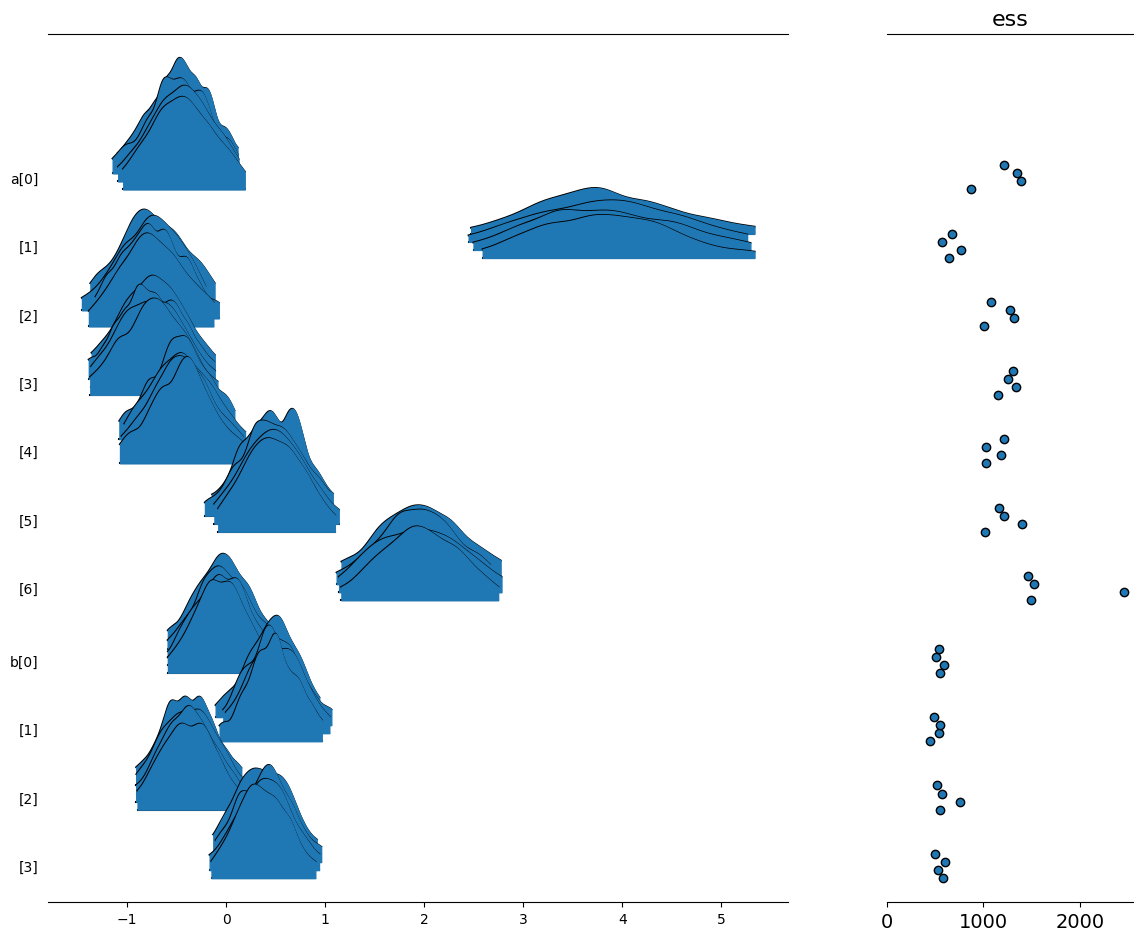

In [13]:
az.plot_forest(m11_4.trace, var_names = ['a','b'],  kind = 'ridgeplot', ess = True)

# <a id='toc13_'></a>[11. Poisson](#toc0_)

In [14]:
from main import*
d = pd.read_csv('./data/Kline.csv', sep = ';')
d["P"] = d.population.pipe(np.log).pipe(lambda x: (x - x.mean()) / x.std())
d["cid"] = (d.contact == "high").astype(int)
d['pLog'] = tf.math.log(d.P).numpy()
formula = dict(main = 'total_tools ~ Poisson(log_rate = LL)',
               likelihood = 'LL ~ alpha',
               prior1 = 'alpha ~ Normal(3,0.5)')
m11_9 = model(formula, d)
m11_9.fit(observed_data = dict(total_tools =d.total_tools.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_9.summary()
#Expected
#  mean   sd 5.5% 94.5% rhat ess_bulk
#a 3.54 0.05 3.46  3.63 1.01   679.05

2024-02-22 10:58:35.842123: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:35.842192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:35.842206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:35.842407: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:35.842421: I tensorflow/core/common_runtime/gpu/gpu

{'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'total_tools': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 1) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
alpha[0],3.54,0.05,3.45,3.62


In [15]:
formula = dict(main = 'total_tools ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ alpha[cid] + beta[cid]*P',
               prior1 = 'alpha ~ Normal(3,0.5)',
               prior2 = 'beta ~ Normal(0,0.2)')
m11_10 = model(formula, d)
m11_10.fit(observed_data = dict(total_tools =d.total_tools.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_10.summary()
# Expected
#     mean   sd     5.5%    94.5% rhat ess_bulk
#a[1] 3.32  0.09     3.19   3.46    1  1553.42
#a[2] 3.61  0.07     3.49   3.73    1  2004.06
#b[1] 0.38  0.05     0.29   0.46    1  1769.96
#b[2] 0.18  0.16    -0.07   0.45    1  1747.86

2024-02-22 10:58:39.832408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:39.832465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:39.832481: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:39.832623: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:39.832630: I tensorflow/core/common_runtime/gpu/gpu

{'beta': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 2) dtype=float32>, 'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>, 'total_tools': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 10) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 2) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
beta[0],0.38,0.05,0.30,0.46
beta[1],0.19,0.16,-0.05,0.46
alpha[0],3.32,0.09,3.17,3.45
alpha[1],3.61,0.07,3.49,3.72


# <a id='toc14_'></a>[12. This doesn't work due to 'P^' WIP: need to implement mathematical operation within formulas](#toc0_)

In [16]:
from main import*
d = pd.read_csv('./data/Kline.csv', sep = ';')
d["P"] = d.population.pipe(np.log).pipe(lambda x: (x - x.mean()) / x.std())
d["cid"] = (d.contact == "high").astype(int)
d['pLog'] = tf.math.log(d.P).numpy()
formula = dict(main = 'total_tools ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ alpha[cid] +  P^beta[cid]',
               prior1 = 'alpha ~ Normal(3.,0.5)',
               prior2 = 'beta ~ Normal(0,0.2)')
m11_11 = model(formula, d)


2024-02-22 10:58:45.262072: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:45.262136: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:45.262152: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:45.262320: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:45.262335: I tensorflow/core/common_runtime/gpu/gpu

# <a id='toc15_'></a>[13. Negative binomial (PB estimation)](#toc0_)

In [17]:
from main import*
num_days = 30
y = tfd.Poisson(rate=1.5).sample((num_days,))
num_weeks = 4
y_new = tfd.Poisson(rate=0.5 * 7).sample((num_weeks,))
y_all = np.concatenate([y, y_new])
exposure = np.concatenate([np.repeat(1, 30), np.repeat(7, 4)])
monastery = np.concatenate([np.repeat(0, 30), np.repeat(1, 4)])
d = pd.DataFrame.from_dict(dict(y=y_all, days=exposure, monastery=monastery))
d["log_days"] = d.days.pipe(np.log)

# Select columns with 'float64' dtype  
float64_cols = list(d.select_dtypes(include='float64'))

# The same code again calling the columns
d[float64_cols] = d[float64_cols].astype('float32')
d.y = d.y.astype('int32')

formula = dict(main = 'y ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ log_days + alpha +  beta * monastery',
               prior1 = 'alpha ~ Normal(0,1)',
               prior2 = 'beta ~ Normal(0,1)')

m11_12 = model(formula, d, float=32)
m11_12.fit(observed_data = dict(y =d.y.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_12.summary()
# Expected
#   mean    sd      5.5%    94.5%
#a  0.37    0.15     0.13    0.61
#b -1.13    0.30    -1.61   -0.65

2024-02-22 10:58:46.928333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:46.928410: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:46.928424: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:46.928782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:46.928794: I tensorflow/core/common_runtime/gpu/gpu

{'beta': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'y': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 34) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
beta[0],-0.42,0.28,-0.87,0.03
alpha[0],0.03,0.17,-0.23,0.31


# <a id='toc16_'></a>[14. Multinomial](#toc0_)

## <a id='toc16_1_'></a>[14.1. Categorical models (WIP: tfd.multinomial to handle)](#toc0_)

In [18]:
from main import*
# simulate career choices among 500 individuals
N = 500  # number of individuals
income = np.array([1, 2, 5])  # expected income of each career
score = 0.5 * income  # scores for each career, based on income

# next line converts scores to probabilities
p = tf.nn.softmax(score)

# now simulate choice
# outcome career holds event type values, not counts
career = np.repeat(np.nan, N)  # empty vector of choices for each individual

# sample chosen career for each individual
for i in range(N):
    career[i] = tfd.Categorical(probs=p).sample()

career = career.astype(int)
result = [income[index] for index in career]
data = {'career': career, 'income': result}
df = pd.DataFrame(data)
df

,career,income
0,0,1
1,1,2
2,1,2
3,2,5
4,2,5
...,...,...
495,2,5
496,2,5
497,2,5
498,2,5


How to programatically determine this model?

In [19]:
def test(N, K = 3, formula = 'alpha + beta*income'):
    def _generator():
        alpha = yield tfd.Sample(tfd.Normal(0,1), sample_shape = (K - 1))
        beta = yield tfd.Sample(tfd.Normal(0,1), sample_shape = 1)
        Class1 =  tf.gather(alpha, [0], axis=-1) + beta * income[0]
        Class2 =  tf.gather(alpha, [1], axis=-1) + beta *income[1]
        Class3 = tf.zeros_like(Class1)  # pivot
        stack = tf.stack([Class1, Class2, Class3], axis=1)
        p =  tf.nn.softmax(stack)
        career =  yield tfd.Independent(tfd.Categorical(probs = p), reinterpreted_batch_ndims=1)
    return tfd.JointDistributionCoroutine(_generator, validate_args=True)

## <a id='toc16_2_'></a>[14.2. Multinomial in disguise as Binomial](#toc0_)

In [20]:
def convert_to_float(df, float_type = 'float32'):
    for col in df.columns:
        if 'float' in str( df[col].dtype)  or 'int' in str( df[col].dtype) :
            df[col] = df[col].astype(float_type)
    return df

In [21]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
d = convert_to_float(d)
d.dtypes

dept                 object
applicant.gender     object
admit               float32
reject              float32
applications        float32
dtype: object

In [22]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
d = convert_to_float(d)
               
formula = dict(main = "y ~ Binomial(applications, logits = lambda)",
               likelihood = 'lambda ~ alpha',
               prior1 = 'alpha ~ Normal(0.,1.5)')
m11_14 = model(formula, d)

m11_14.fit(observed_data = dict(y =d.admit.values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_14.invt_logit(np.mean(m11_14.posterior['alpha']))
# Expected 0.38

2024-02-22 10:58:53.304496: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:53.304558: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:53.304574: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:53.304693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:53.304699: I tensorflow/core/common_runtime/gpu/gpu

{'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'y': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 12) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


0.3877187844382447

## <a id='toc16_3_'></a>[14.3. Multinomial in disguise as Poisson](#toc0_)

We can run N independent poisson models (one for each class) and compute there probability using the posteriors fo each models

In [23]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
formula = dict(main = 'y ~ Poisson(log_rate=lambda1)',
               likelihood = 'lambda1 ~ alpha',
               prior1 = 'alpha ~ Normal(0.,1.5)'
               )
m11_14 = model(formula, d)
m11_14.fit(observed_data = dict(y =d.admit.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
formula = dict(main = 'y ~ Poisson(log_rate=lambda1)',
               likelihood = 'lambda1 ~ alpha',
               prior1 = 'alpha ~ Normal(0.,1.5)'
               )
m11_14_2 = model(formula, d)
m11_14_2.fit(observed_data = dict(y =d.reject.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)

a1 = tf.reduce_mean(m11_14.posterior["alpha"][0], 0)
a2 = tf.reduce_mean(m11_14_2.posterior["alpha"][0], 0)
tf.exp(a1) / (tf.exp(a1) + tf.exp(a2))
# Expected 0.38

2024-02-22 10:58:57.508364: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:57.508417: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:57.508432: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:57.508621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:58:57.508634: I tensorflow/core/common_runtime/gpu/gpu

{'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'y': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 1) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


2024-02-22 10:59:01.352149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:01.352201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:01.352217: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:01.352321: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:01.352326: I tensorflow/core/common_runtime/gpu/gpu

{'alpha': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'y': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 1) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.39365643], dtype=float32)>

# <a id='toc17_'></a>[15. Beta binomial](#toc0_)

In [24]:
# TODO: Need to include other params in traces
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
d["gid"] = (d["applicant.gender"] != "male").astype(int)
len(d.applications)
formula = dict(main = 'y ~ BetaBinomial(12, concentration1 = pbar, concentration0 = theta)',
               likelihood = 'pbar ~ sigmoid(a[gid])',
               likelihood2 = 'theta ~ phi + -2.0',
               prior1 = 'a ~ Normal(0.,1.5)',
               prior2 = 'phi ~ Exponential(1)'
               )

m12_1 = model(formula, d)
m12_1.fit(observed_data = dict(y =d.admit.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m12_1.summary()
# Expected
#       mean   sd  5.5% 94.5% rhat ess_bulk
#a[1]  -0.45 0.41 -1.11  0.19    1  1149.68
#a[2]  -0.33 0.42 -1.01  0.32    1  1200.94
#phi    1.01 0.79  0.09  2.47    1   936.25
#theta  3.01 0.79  2.09  4.47    1   936.28

2024-02-22 10:59:05.555290: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:05.555342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:05.555357: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:05.555525: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:05.555537: I tensorflow/core/common_runtime/gpu/gpu

{'phi': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'a': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>, 'y': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 12) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 2) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
phi[0],0.90,0.46,0.48,1.68
a[0],0.68,1.16,-0.79,2.43
a[1],-1.58,1.42,-3.94,-0.19


# <a id='toc18_'></a>[16. Zero-inflated outcomes](#toc0_)

## <a id='toc18_1_'></a>[Using ZeroInflatedNegativeBinomial function](#toc0_)

In [25]:
#TODO: Issues with ZeroInflatedNegativeBinomial arguments
from main import*
import random
random.seed(42)
# Define parameters
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day

# sample one year of production
N = 365

np.random.seed(365)
drink = np.random.binomial(1, prob_drink, N)
y = (1 - drink) * np.random.poisson(rate_work, N)
d = pd.DataFrame(y)
formula = dict(main = 'y ~ ZeroInflatedNegativeBinomial(total_count = 365, inflated_loc_logits = p, logits = AL)',
               likelihood = "p ~ ap",
               likelihood2 = "AL ~ tf.math.log(al)",
               prior1 = 'ap ~ Normal(-1.5 , 1)',
               prior2 = 'al ~ Normal(1,0.5)'
               )

m12_3 = model()
m12_3 = model(formula)       
m12_3.fit(observed_data = dict(y = d.iloc[:,0].astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m12_3.summary()
# Expected
#       mean    sd      5.5%    94.5%   n_eff   Rhat
#ap     -1.28   0.35    -1.89   -0.79   657     1
#al     0.01    0.09    -0.14   0.16    759     1

2024-02-22 10:59:12.055289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:12.055347: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:12.055367: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:12.055543: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 10:59:12.055557: I tensorflow/core/common_runtime/gpu/gpu

{'ap': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'al': <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>, 'y': <tf.Tensor 'JointDistributionNamed/sample/Independentmain/sample/Reshape:0' shape=(4, 1) dtype=float32>}
[<tf.Tensor 'JointDistributionNamed/sample/Sampleprior1/sample/Reshape:0' shape=(4, 1) dtype=float32>, <tf.Tensor 'JointDistributionNamed/sample/Sampleprior2/sample/Reshape:0' shape=(4, 1) dtype=float32>]
[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
ap[0],-1.72,1.02,-2.76,-0.58
al[0],-0.04,0.11,-0.23,0.07


## <a id='toc18_2_'></a>[Using Inflated function](#toc0_)

In [44]:
#TODO: Inflated require a distribution and not a symbolic tensor, this leed to the impossibility for the optimization of the distribution. 
#   1.How to convert a symbolic tensor to a probability distribution?
#   2. Allow distributions as parameters
from main import *
formula = dict(main = 'y ~ Inflated(distribution = L, inflated_loc_probs = P)',
               prior1 = 'P ~ NegativeBinomial(5. , 0.1)',
               prior2 = 'L ~ Normal(0.,1.5)')
m11_14 = model(formula,)
m11_14.sample()

2024-02-22 11:04:24.819701: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 11:04:24.819745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 11:04:24.819758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 11:04:24.819858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 11:04:24.819863: I tensorflow/core/common_runtime/gpu/gpu

NameError: name 'Normal' is not defined

# <a id='toc19_'></a>[Ordered categorical outcomes (TODO)](#toc0_)

# <a id='toc20_'></a>[Ordered categorical predictors (TODO)](#toc0_)

# <a id='toc21_'></a>[Varying Slopes Models](#toc0_)

In [3]:
#TODO: 1. AUtomatically reshaoe init states
#      2. Why sigmoid needed where and now on?
from main import*
d = pd.read_csv('./data/reedfrogs.csv', sep = ';')
d["tank"] = np.arange(d.shape[0])
alpha_sample_shape = d["tank"].shape[0]
d.dtypes
d.density = d.density.astype('float32')
d.tank = d.tank.astype('float32')
d.surv = d.surv.astype('float32')
formula = dict(main = 'y ~ Binomial(total_count = density, probs = p)',
               likelihood = 'p ~ sigmoid(alpha[tank])',
               prior = 'alpha ~ Normal(a_bar, sigma)',
               prior1 = 'a_bar ~ Normal(0.,1.5)',
               prior2 = 'sigma ~ Exponential(1)'
               )
m13_2 = model(formula, d)

num_chains = 4
samples = m13_2.sample(num_chains)
# Reshape samples to desired shapes
samples['a_bar'] = tf.squeeze(samples['a_bar'], axis=-1)  # shape=(4,)
samples['sigma'] = tf.squeeze(samples['sigma'], axis=-1)  # shape=(4,)
samples['alpha'] = tf.reshape(samples['alpha'], (4, 48))   # shape=(4, 48)
samples
observed_data = dict(y =d.surv.astype('float32').values)
for k in observed_data.keys():
    samples.pop(k)
samples

bijectors = [tfp.bijectors.Identity() for _ in samples]
init_state = list(samples.values())
init_state

targetinit_state = [tf.zeros([num_chains]),tf.ones([num_chains]),tf.zeros([num_chains, 48])]


m13_2.fit(observed_data = dict(y =d.surv.astype('float32').values), 
init = init_state, bijectors = bijectors,
num_chains= num_chains)
m13_2.summary().head

# Expected
#	    mean	sd	    hdi_5.5%	hdi_94.5%	mcse_mean	mcse_sd	    ess_bulk	ess_tail	r_hat
#a_bar	1.36	0.27	0.92	    1.76	    0.02	    0.01	    246.09	    141.34	    1.01
#sigma	1.63	0.19	1.33	    1.92	    0.02	    0.01	    92.70	    203.42	    1.02

2024-02-22 12:11:22.037873: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 12:11:22.037945: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 12:11:22.037987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 12:11:22.038176: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-22 12:11:22.038188: I tensorflow/core/common_runtime/gpu/gpu

HMC done


,mean,sd,hdi_5.5%,hdi_94.5%
sigma,1.03,0.78,0.40,2.36
a_bar,-0.14,1.04,-1.90,0.80
alpha[0],-0.62,1.40,-2.30,0.85
alpha[1],-0.02,0.99,-1.62,1.04
alpha[2],0.62,1.60,-1.69,2.83
alpha[3],-0.12,0.90,-0.92,1.35
alpha[4],-0.39,1.51,-2.05,1.30
alpha[5],-0.18,1.10,-2.05,0.76
alpha[6],-1.12,2.47,-4.62,1.74
alpha[7],-0.76,1.40,-2.49,0.79


In [3]:
num_chains = 4
samples = m13_2.sample(num_chains)
# Reshape samples to desired shapes
samples['a_bar'] = tf.squeeze(samples['a_bar'], axis=-1)  # shape=(4,)
samples['sigma'] = tf.squeeze(samples['sigma'], axis=-1)  # shape=(4,)
samples['alpha'] = tf.reshape(samples['alpha'], (4, 48))   # shape=(4, 48)
samples
observed_data = dict(y =d.surv.astype('float32').values)
for k in observed_data.keys():
    samples.pop(k)
samples

bijectors = [tfp.bijectors.Identity() for _ in samples]
init_state = list(samples.values())
init_state

targetinit_state = [tf.zeros([num_chains]),tf.ones([num_chains]),tf.zeros([num_chains, 48])]


m13_2.fit(observed_data = dict(y =d.surv.astype('float32').values), 
init = init_state, bijectors = bijectors,
num_chains=4)

HMC done


In [4]:
m13_2.summary()

,mean,sd,hdi_5.5%,hdi_94.5%
sigma,1.63,0.21,1.30,1.96
a_bar,1.33,0.25,0.93,1.72
alpha[0],2.11,0.89,0.63,3.45
alpha[1],2.82,1.07,1.20,4.52
alpha[2],0.90,0.65,-0.13,1.97
alpha[3],3.48,1.09,1.78,5.29
alpha[4],2.04,0.84,0.79,3.48
alpha[5],2.18,0.95,0.66,3.76
alpha[6],2.87,1.11,1.10,4.47
alpha[7],1.97,0.86,0.59,3.29


In [4]:

#bijectors = [tfp.bijectors.Identity(),  tfp.bijectors.Exp(), tfp.bijectors.Identity()]
res = run_modelH(m13_2.tensor, observed_data = dict(y =d.surv.astype('float32').values), params = m13_2.priors_name,
 num_chains = 4, init = init_state, bijectors = bijectors)

In [5]:
posterior, sample_stats = res
p = dict(zip(m13_2.tensor._flat_resolve_names(), posterior))

In [35]:
samples = m13_2.sample(4)
# Reshape samples to desired shapes
samples['a_bar'] = tf.squeeze(samples['a_bar'], axis=-1)  # shape=(4,)
samples['sigma'] = tf.squeeze(samples['sigma'], axis=-1)  # shape=(4,)
samples['alpha'] = tf.reshape(samples['alpha'], (4, 48))   # shape=(4, 48)
samples
observed_data = dict(y =d.surv.astype('float32').values)
for k in observed_data.keys():
    samples.pop(k)
samples

bijectors = [tfp.bijectors.Identity() for _ in samples]
init_state = list(samples.values())
init_state

targetinit_state = [tf.zeros([num_chains]),tf.ones([num_chains]),tf.zeros([num_chains, 48])]
#bijectors = [tfp.bijectors.Identity(),  tfp.bijectors.Exp(), tfp.bijectors.Identity()]
res = run_modelH(m13_2.tensor, observed_data = dict(y =d.surv.astype('float32').values), params = m13_2.priors_name,
 num_chains = 4, init = init_state, bijectors = bijectors)

In [8]:
res = run_modelH(m13_2.tensor, observed_data = dict(y =d.surv.astype('float32').values), params = m13_2.priors_name,
 num_chains = 4, init = init_state, bijectors = bijectors)

In [37]:
posterior, sample_stats = res
p = dict(zip(m13_2.tensor._flat_resolve_names(), posterior))

tfp_trace = res
var_names = p
samps, trace = tfp_trace
params = m13_2.priors_name
sample_stats_name=['log_likelihood','tree_size','mean_tree_accept']

sample_stats = {k:v.numpy().T for k, v in zip(sample_stats_name, trace)}
transposed_results = []
trace = {}
for name, samp in zip(var_names, samps):
    if len(samp.shape) == 2:
        transposed_shape = [1, 0]
    elif len(samp.shape) == 3:
        transposed_shape = [1, 0, 2]
    else:
        transposed_shape = [1, 0, 2, 3]
    trace[name] = tf.transpose(samp, transposed_shape)
trace = az.from_dict(posterior=trace, sample_stats=sample_stats)
az.summary(trace)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.607,0.200,1.256,1.993,0.023,0.017,65.0,163.0,1.06
a_bar,1.343,0.251,0.846,1.804,0.016,0.012,241.0,453.0,1.02
alpha[0],2.191,1.037,0.359,4.091,0.180,0.128,35.0,80.0,1.09
alpha[1],3.163,1.064,1.247,5.070,0.214,0.153,25.0,131.0,1.11
alpha[2],1.011,0.628,-0.097,2.246,0.057,0.041,122.0,226.0,1.02
alpha[3],3.317,1.064,1.346,5.346,0.193,0.138,29.0,132.0,1.10
alpha[4],2.315,0.957,0.741,4.229,0.167,0.119,34.0,94.0,1.14
alpha[5],2.199,0.770,0.825,3.718,0.122,0.092,42.0,99.0,1.09
alpha[6],3.152,1.120,1.147,5.343,0.183,0.132,38.0,96.0,1.05
alpha[7],2.099,0.812,0.578,3.555,0.098,0.070,68.0,141.0,1.06


# <a id='toc22_'></a>[Full parameters estimations](#toc0_)
The idea is to decompose at a maximum a fomrula to get all parameters estimation:

In [38]:
m = {}
m['a'] = tfd.Sample(tfd.Normal(0,10), sample_shape = 1)
m['b'] = tfd.Sample(tfd.Normal(0,10), sample_shape = 1)
m['lk'] = lambda a, b: tfd.Independent(tfd.Normal(a + b, 1), reinterpreted_batch_ndims = 1)
m['main'] = lambda lk: tfd.Independent(tfd.Binomial(1, logits = lk), reinterpreted_batch_ndims=1)
M = tfd.JointDistributionNamed(m)
M.sample()

{'b': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([9.141942], dtype=float32)>,
 'a': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.37029612], dtype=float32)>,
 'lk': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([9.301706], dtype=float32)>,
 'main': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>}

Instead of:

In [39]:
m = {}
m['a'] = tfd.Sample(tfd.Normal(0,10), sample_shape = 1)
m['b'] = tfd.Sample(tfd.Normal(0,10), sample_shape = 1)
m['main'] = lambda a, b: tfd.Independent(tfd.Binomial(1, logits = tfd.Normal(a + b, 1).sample()), reinterpreted_batch_ndims=1)
M = tfd.JointDistributionNamed(m)
M.sample()

{'b': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([6.359626], dtype=float32)>,
 'a': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.9251223], dtype=float32)>,
 'main': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>}